## BANK LOAN ANALYSIS PYTHON REPORT ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [6]:
import pandas as pd
df = pd.read_csv(r"D:\financial_loan (1).csv")
df.head()

id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership  issue_date last_credit_pull_date last_payment_date  \
0     C           RENT  11-02-2021            13-09-2021        13-04-2021   
1     E           RENT  01-01-2021            14-12-2021        15-01-2021   
2     C           RENT  05-01-2021            12-12-2021        09-01-2021   
3     B       MORTGAGE  25-02-2021            12-12-2021        12-03-2021   
4     A       MORTGAGE  01-01-2021            14-12-2021        15-01-2021   

   ... sub_grade        term  verification_status annual_income     dti  \
0  ...        C4   60 months      Source Verified       30000.0  0.0100   
1  ...        E1   36 months      Source Verified       48000.0  0.0535   
2  ...        C5   36 months         Not Verified       50000.0  0.2088   
3  ...        B2   60 months      Source Verified       42000.0  0.0540   
4  ...        A1   36 months             Verified       83000.0  0.0231   

  installment int_rate  loan_amount  total_acc  total_payment  
0       59.83   0.1527         2500          4           1009  
1      109.43   0.1864         3000          4           3939  
2      421.65   0.1596        12000         11           3522  
3       97.06   0.1065         4500          9           4911  
4      106.53   0.0603         3500         28           3835  

[5 rows x 24 columns]

In [7]:
df.tail()

id address_state application_type emp_length  \
38571  803452            NJ       INDIVIDUAL   < 1 year   
38572  970377            NY       INDIVIDUAL    8 years   
38573  875376            CA       INDIVIDUAL    5 years   
38574  972997            NY       INDIVIDUAL    5 years   
38575  682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership  issue_date  \
38571         Joseph M Sanzari Company     C       MORTGAGE  11-07-2021   
38572                        Swat Fame     C           RENT  11-10-2021   
38573  Anaheim Regional Medical Center     D           RENT  11-09-2021   
38574               Brooklyn Radiology     D           RENT  11-10-2021   
38575                    Allen Edmonds     F           RENT  11-07-2021   

      last_credit_pull_date last_payment_date  ... sub_grade        term  \
38571            16-05-2021        16-05-2021  ...        C1   60 months   
38572            16-04-2021        16-05-2021  ...        C1   60 months   
38573            16-05-2021        16-05-2021  ...        D5   60 months   
38574            16-05-2021        16-05-2021  ...        D5   60 months   
38575            16-05-2021        16-05-2021  ...        F3   60 months   

       verification_status annual_income     dti installment int_rate  \
38571             Verified      100000.0  0.1986      551.64   0.1299   
38572             Verified       50000.0  0.0458      579.72   0.1349   
38573             Verified       65000.0  0.1734      627.93   0.1749   
38574             Verified      368000.0  0.0009      612.72   0.1825   
38575             Verified       80000.0  0.0600      486.86   0.2099   

       loan_amount  total_acc  total_payment  
38571        24250         33          31946  
38572        25200         18          31870  
38573        25000         20          35721  
38574        24000          9          33677  
38575        18000          7          27679  

[5 rows x 24 columns]

In [10]:
print("No of Rows:",df.shape[0])

No of Rows: 38576


In [11]:
print("No of Columns:",df.shape[1])

No of Columns: 24


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [13]:
df.describe()

id     member_id  annual_income           dti   installment  \
count  3.857600e+04  3.857600e+04   3.857600e+04  38576.000000  38576.000000   
mean   6.810371e+05  8.476515e+05   6.964454e+04      0.133274    326.862965   
std    2.113246e+05  2.668105e+05   6.429368e+04      0.066662    209.092000   
min    5.473400e+04  7.069900e+04   4.000000e+03      0.000000     15.690000   
25%    5.135170e+05  6.629788e+05   4.150000e+04      0.082100    168.450000   
50%    6.627280e+05  8.473565e+05   6.000000e+04      0.134200    283.045000   
75%    8.365060e+05  1.045652e+06   8.320050e+04      0.185900    434.442500   
max    1.077501e+06  1.314167e+06   6.000000e+06      0.299900   1305.190000   

           int_rate   loan_amount     total_acc  total_payment  
count  38576.000000  38576.000000  38576.000000   38576.000000  
mean       0.120488  11296.066855     22.132544   12263.348533  
std        0.037164   7460.746022     11.392282    9051.104777  
min        0.054200    500.000000      2.000000      34.000000  
25%        0.093200   5500.000000     14.000000    5633.000000  
50%        0.118600  10000.000000     20.000000   10042.000000  
75%        0.145900  15000.000000     29.000000   16658.000000  
max        0.245900  35000.000000     90.000000   58564.000000

In [14]:
total_loan_application=df['id'].count()
print("Total Loan Application:",total_loan_application)

Total Loan Application: 38576


In [17]:
import pandas as pd

# Parse with dayfirst since your format is DD-MM-YYYY
df['issue_date'] = pd.to_datetime(df['issue_date'], dayfirst=True)

# Now extract latest year/month
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

# Filter MTD (Month-To-Date) data
mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

# Count loan applications
mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_applications}")


MTD Loan Applications (for December 2021): 4314


In [18]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount / 1_000_000
print("Total Funded Amount: ${:,.2f}M".format(total_funded_amount_millions))

Total Funded Amount: $435.76M


In [19]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

# Filter Month-To-Date data
mtd_data = df[(df['issue_date'].dt.year == latest_year) & 
              (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1_000_000

print("MTD Total Funded Amount: ${:,.2f}M".format(mtd_total_funded_amount_millions))

MTD Total Funded Amount: $53.98M


In [20]:
average_interest_rate=df['int_rate'].mean()*100
print("Avg Int Rate:{:.2f}%".format(average_interest_rate))

Avg Int Rate:12.05%


In [21]:
average_dti=df['dti'].mean()*100
print("Avg DTI:{:.2f}%".format(average_dti))

Avg DTI:13.33%


In [22]:
# Good Loan Metrics
# Filter good loans (Fully Paid or Current)
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]
# Total applications
total_loan_applications = df['id'].count()
# Good loan stats
good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()
# Convert to millions
good_loan_funded_amount_millions = good_loan_funded_amount / 1_000_000
good_loan_received_millions = good_loan_received / 1_000_000
# Percentage of good loans
good_loan_percentage = (good_loan_applications / total_loan_applications) * 100
# Print results
print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount (in Millions): ${:,.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received (in Millions): ${:,.2f}M".format(good_loan_received_millions))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


In [23]:
# Bad Loan Metrics
# Filter Bad loans (Fully Paid or Current)
bad_loans = df[df['loan_status'].isin(["Charged Off"])]
# Total applications
total_loan_applications = df['id'].count()
# Bad loan stats
bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()
# Convert to millions
bad_loan_funded_amount_millions = bad_loan_funded_amount / 1_000_000
bad_loan_received_millions = bad_loan_received / 1_000_000
# Percentage of bad loans
bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100
# Print results
print("Bad Loan Applications:", bad_loan_applications)
print("Bad Loan Funded Amount (in Millions): ${:,.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Received (in Millions): ${:,.2f}M".format(bad_loan_received_millions))
print("Percentage of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))

Bad Loan Applications: 5333
Bad Loan Funded Amount (in Millions): $65.53M
Bad Loan Total Received (in Millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


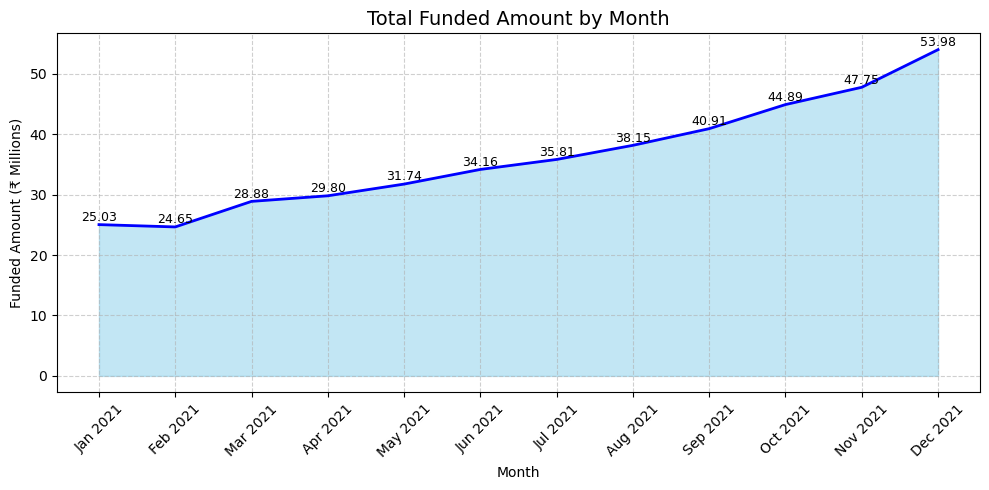

In [24]:
# Monthly Funded Loan Amount
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1_000_000)   # Convert to Millions
      .reset_index(name='loan_amount_millions')
)
# Plotting
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], 
                 color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], 
         color='blue', linewidth=2)
# Annotating values on the plot
for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, 
             f"{row['loan_amount_millions']:.2f}", 
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')
# Titles and labels
plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (₹ Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

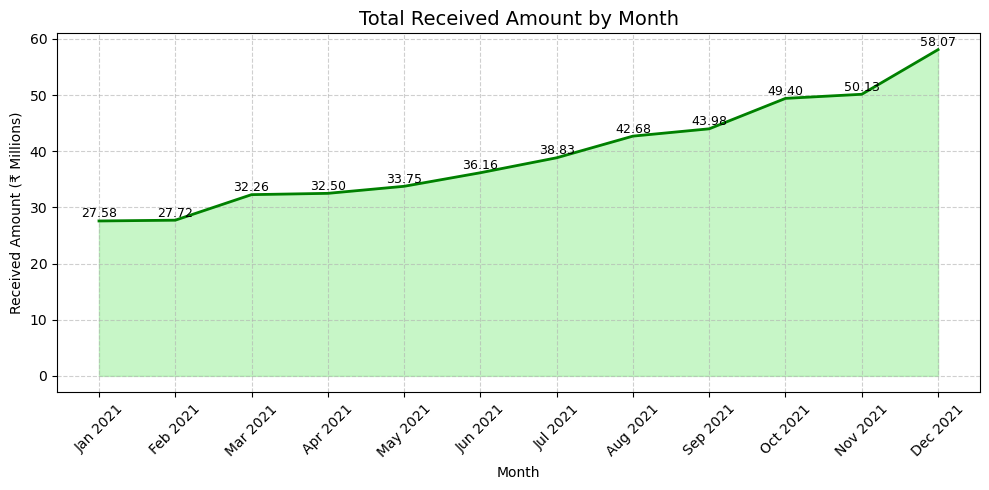

In [28]:
# Monthly Recived Loan Amount
monthly_received = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['total_payment']
      .sum()
      .div(1_000_000)   # Convert to Millions
      .reset_index(name='received_amount_millions')
)
# Plotting
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_received['month_name'], monthly_received['received_amount_millions'], 
                 color='lightgreen', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['received_amount_millions'], 
         color='green', linewidth=2)
# Annotating values on the plot
for i, row in monthly_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.1, 
             f"{row['received_amount_millions']:.2f}", 
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')
# Titles and labels
plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount (₹ Millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


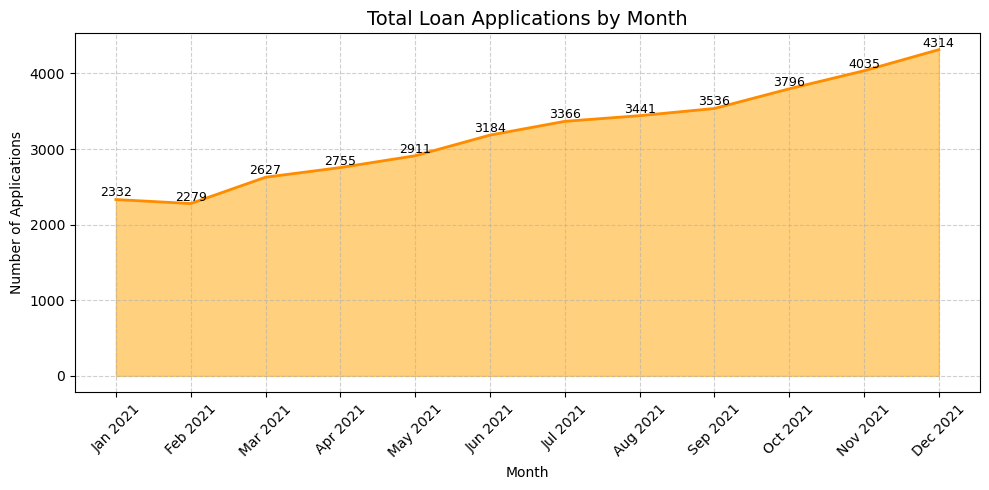

In [30]:
# Total Loan Application
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['id']
      .count()
      .reset_index(name='loan_applications_count')
)
# Plotting
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['loan_applications_count'], 
                 color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications_count'], 
         color='darkorange', linewidth=2)
# Annotating values on the plot
for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5, 
             f"{row['loan_applications_count']}", 
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')
# Titles and labels
plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

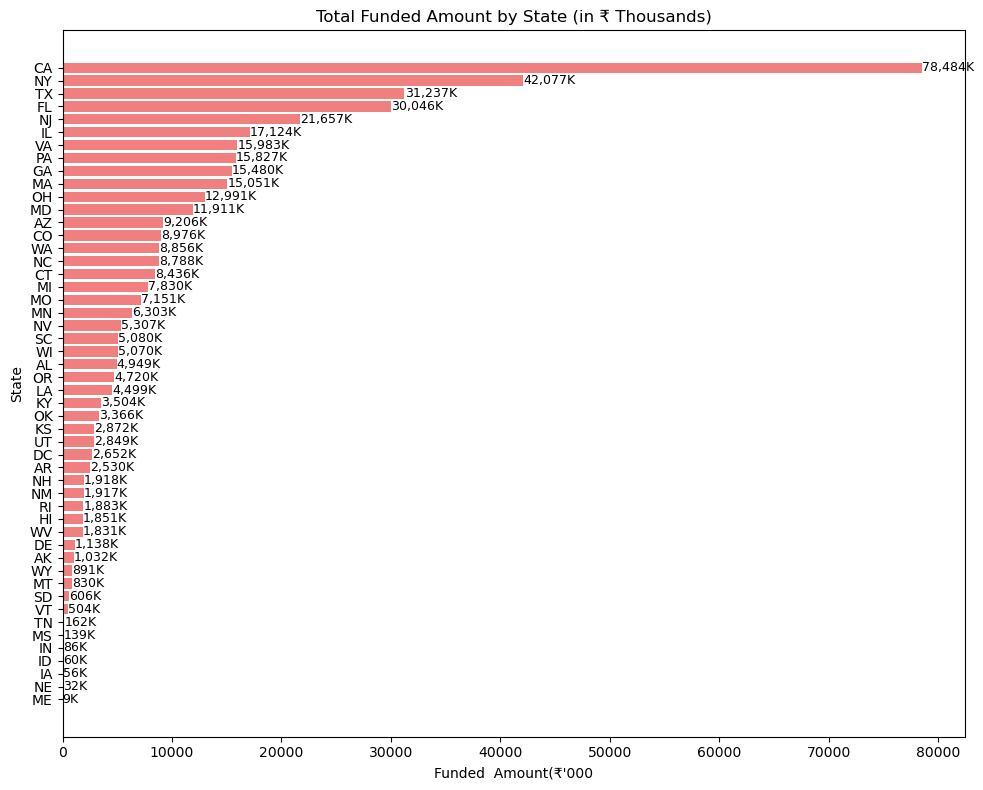

In [31]:
state_funding=df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding/1000

plt.figure(figsize=(10, 8))
bars= plt.barh(state_funding_thousands.index,state_funding_thousands.values,color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width +10,bar.get_y()+bar.get_height()/2, 
             f'{width:,.0f}K', 
             va='center', fontsize=9)
plt.title('Total Funded Amount by State (in ₹ Thousands)')
plt.xlabel('Funded  Amount(₹\'000')
plt.ylabel('State')
plt.tight_layout()
plt.show()

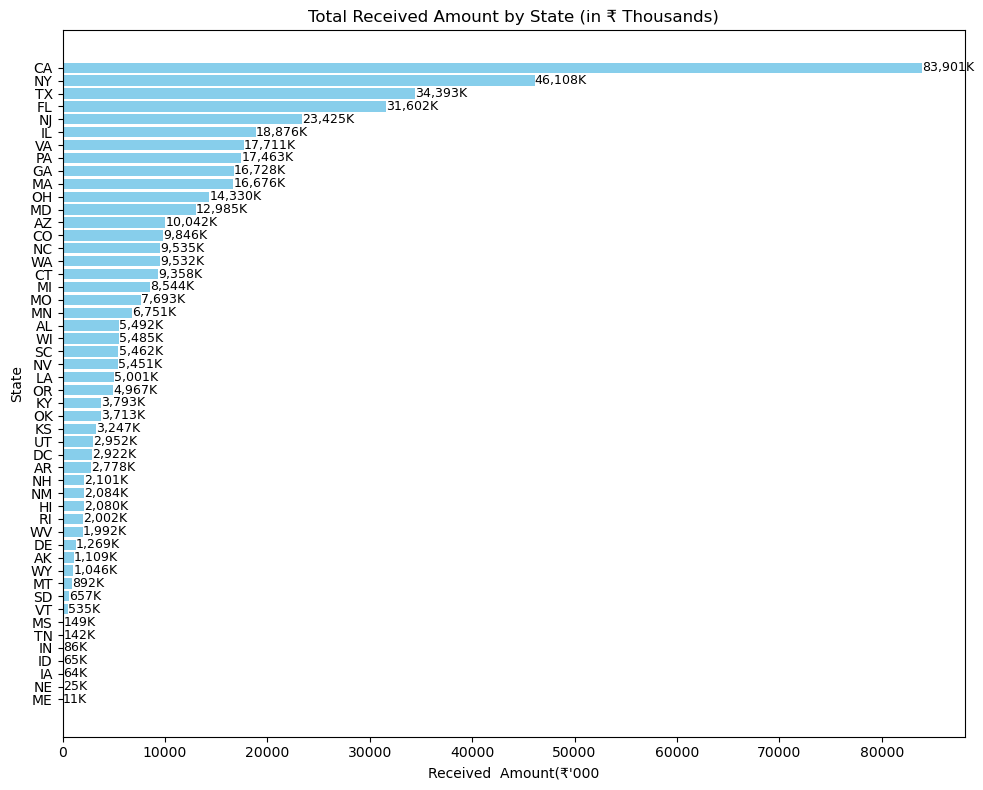

In [33]:
state_received=df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_received_thousands = state_received/1000

plt.figure(figsize=(10, 8))
bars= plt.barh(state_received_thousands.index,state_received_thousands.values,color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width +10,bar.get_y()+bar.get_height()/2, 
             f'{width:,.0f}K', 
             va='center', fontsize=9)
plt.title('Total Received Amount by State (in ₹ Thousands)')
plt.xlabel('Received  Amount(₹\'000')
plt.ylabel('State')
plt.tight_layout()
plt.show()

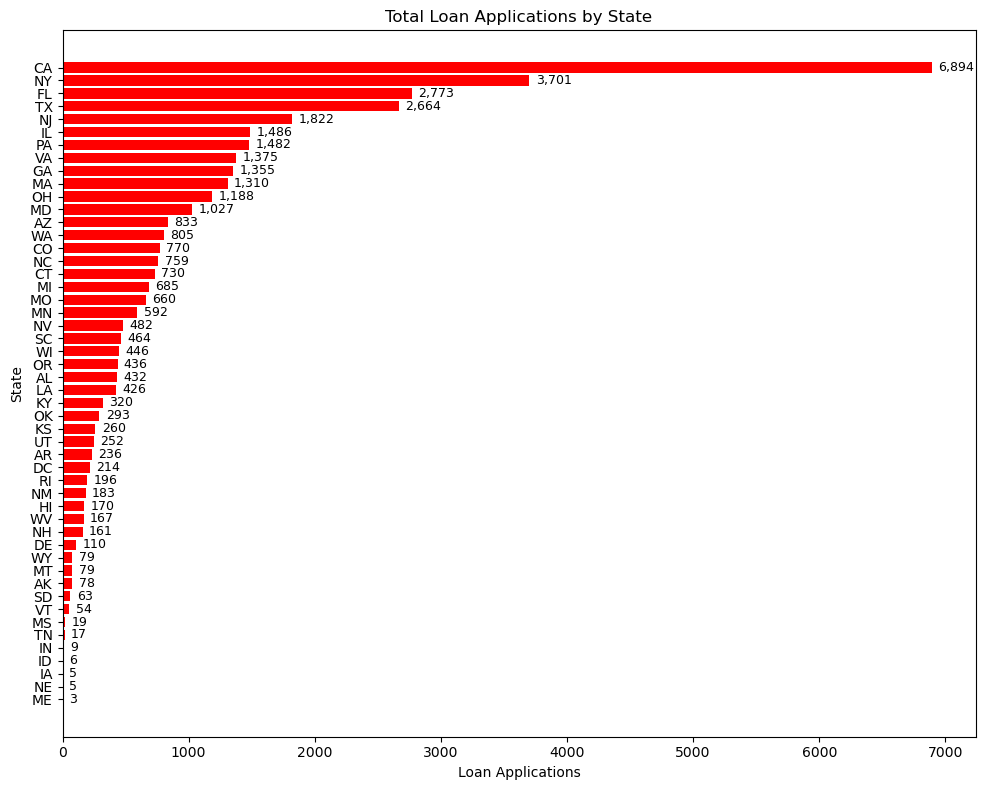

In [38]:
# Group by state and count loan applications
state_loan_application = (
    df.groupby('address_state')['id']
      .count()
      .sort_values(ascending=True)   # keep full counts
)

# Plotting
plt.figure(figsize=(10, 8))
bars = plt.barh(state_loan_application.index, state_loan_application.values, color='red')

# Annotate values (show full count with commas)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50,  # shift slightly right from bar
             bar.get_y() + bar.get_height()/2, 
             f'{width:,.0f}',    # full number with commas
             va='center', fontsize=9)

plt.title('Total Loan Applications by State')
plt.xlabel('Loan Applications')
plt.ylabel('State')
plt.tight_layout()
plt.show()


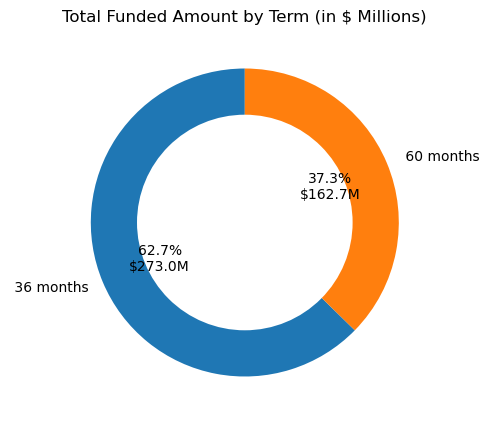

In [40]:
# Loan Term Analysis by Total Funded Amount
term_funding_millions = (
    df.groupby('term')['loan_amount']
      .sum() / 1_000_000   # Convert to Millions
)
plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}   # makes it a donut chart
)
# Add white circle in center for donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Total Funded Amount by Term (in $ Millions)", fontsize=12)
plt.show()


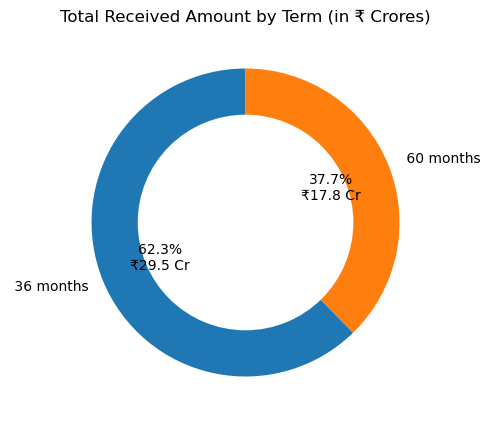

In [41]:
# Loan Term Analysis by Total Received Amount
term_received_crores = (
    df.groupby('term')['total_payment']
      .sum() / 1_00_00_000    # Convert to Crores (₹)
)
plt.figure(figsize=(5, 5))
plt.pie(
    term_received_crores,
    labels=term_received_crores.index,
    autopct=lambda p: f"{p:.1f}%\n₹{p*sum(term_received_crores)/100:.1f} Cr",
    startangle=90,
    wedgeprops={'width': 0.4}   # donut chart effect
)
# Add white circle in the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Total Received Amount by Term (in ₹ Crores)", fontsize=12)
plt.show()

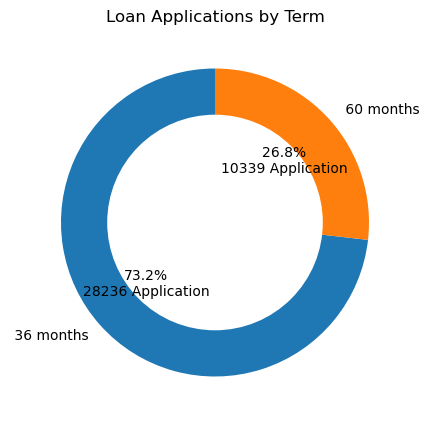

In [43]:
# Loan Term Analysis by Loan Applications
term_applications = (
    df.groupby('term')['id']   # count loan applications per term
      .count()
)
plt.figure(figsize=(5, 5))
plt.pie(
    term_applications,
    labels=term_applications.index,
    autopct=lambda p: f"{p:.1f}%\n{int(p*sum(term_applications)/100)} Application",
    startangle=90,
    wedgeprops={'width': 0.4}   # donut chart
)
# Add white circle in the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Loan Applications by Term", fontsize=12)
plt.show()

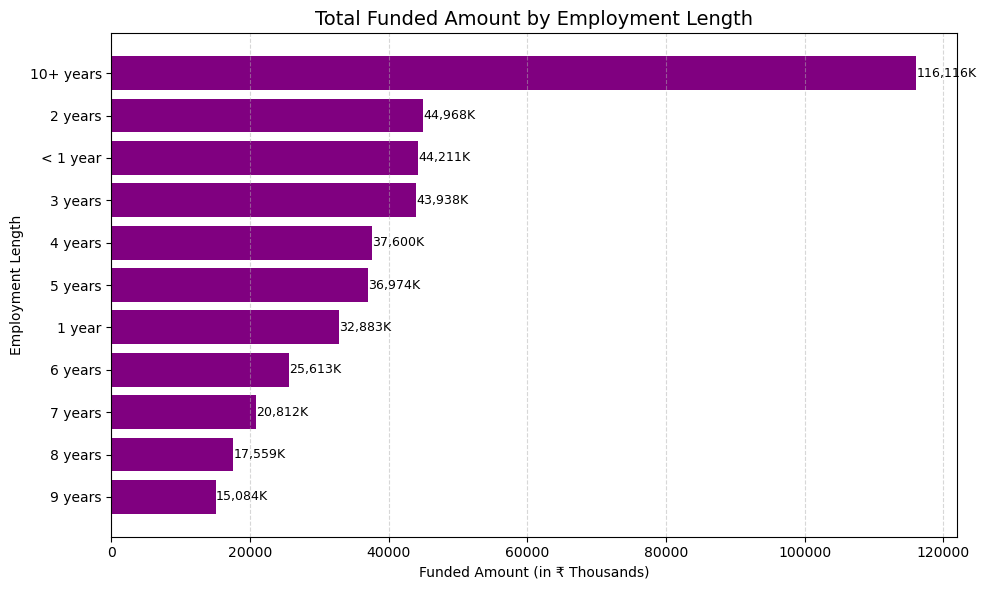

In [49]:
# Group by employment length and calculate total funded amount
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1000   # in ₹ Thousands
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding.index, emp_funding.values, color='purple')
# Annotate values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}K', 
             va='center', fontsize=9)
# Titles and labels
plt.title("Total Funded Amount by Employment Length", fontsize=14) 
plt.xlabel("Funded Amount (in ₹ Thousands)")
plt.ylabel("Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

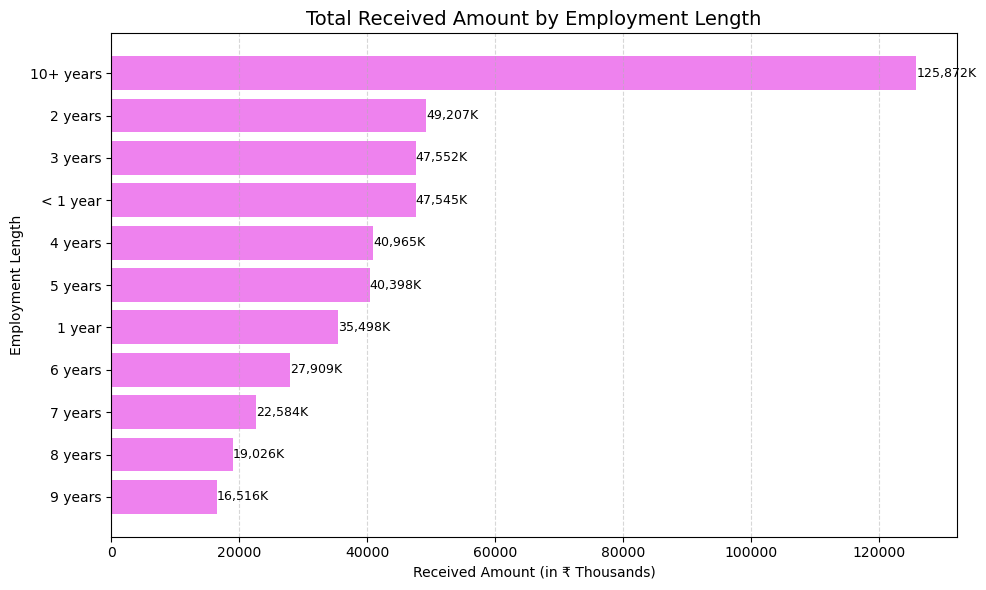

In [51]:
# Group by employment length and calculate total Received amount
emp_received = df.groupby('emp_length')['total_payment'].sum().sort_values() / 1000   # in ₹ Thousands
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(emp_received.index, emp_received.values, color='violet')

# Annotate values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f'{width:,.0f}K', 
             va='center', fontsize=9)
# Titles and labels
plt.title("Total Received Amount by Employment Length", fontsize=14) 
plt.xlabel("Received Amount (in ₹ Thousands)")
plt.ylabel("Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

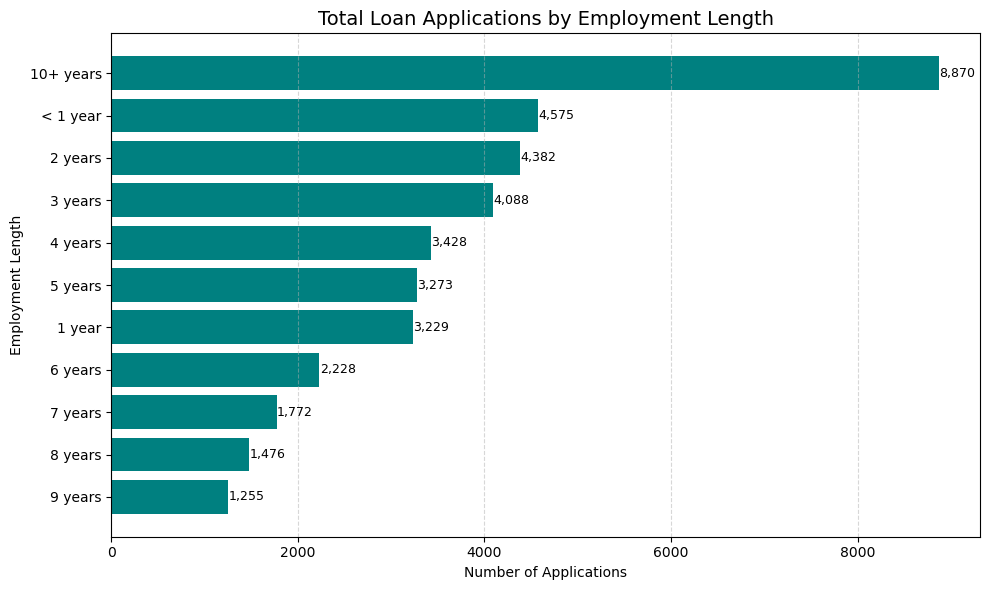

In [52]:
# Group by employment length and count loan applications
emp_applications = df.groupby('emp_length')['id'].count().sort_values()
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(emp_applications.index, emp_applications.values, color='teal')
# Annotate values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f'{width:,}',   # formatted with commas
             va='center', fontsize=9)
# Titles and labels
plt.title("Total Loan Applications by Employment Length", fontsize=14) 
plt.xlabel("Number of Applications")
plt.ylabel("Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

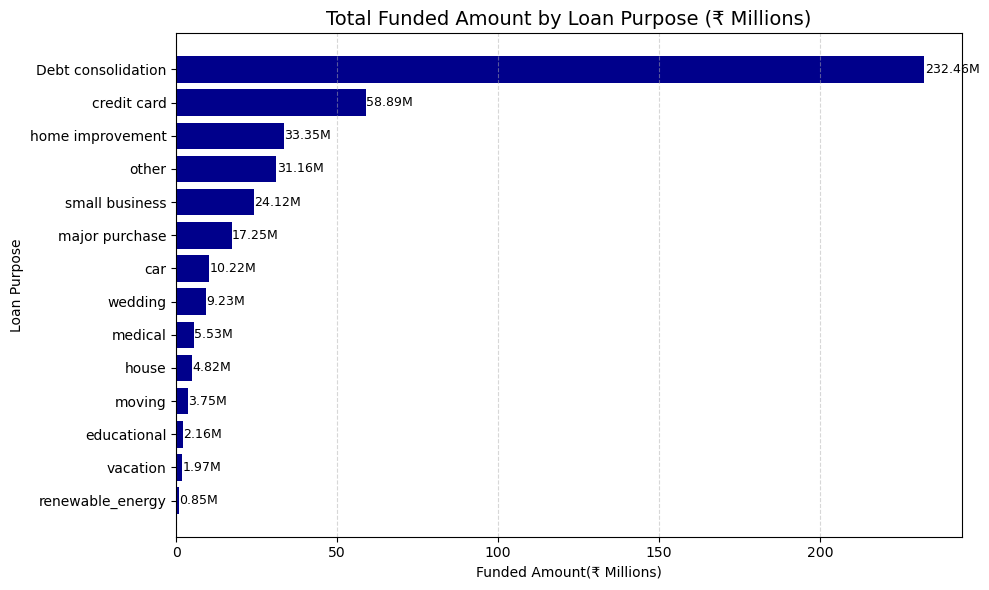

In [56]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000)
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='darkblue')
# Annotate values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}M',  
             va='center', fontsize=9)
# Titles and labels
plt.title('Total Funded Amount by Loan Purpose (₹ Millions)', fontsize=14) 
plt.xlabel('Funded Amount(₹ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

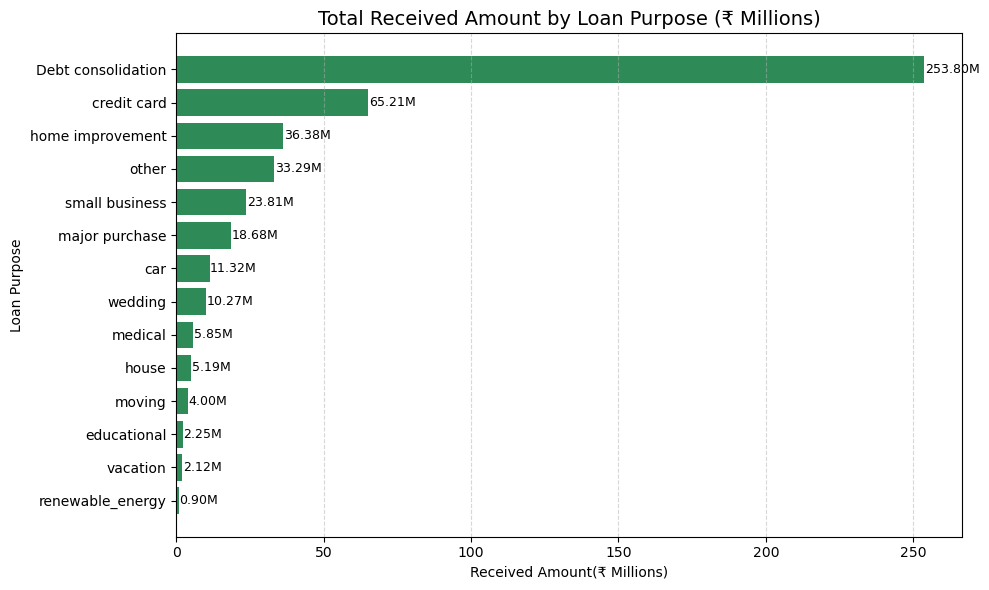

In [59]:
purpose_received_millions = (df.groupby('purpose')['total_payment'].sum().sort_values()/1000000)
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_received_millions.index, purpose_received_millions.values, color='seagreen')
# Annotate values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}M',  
             va='center', fontsize=9)
# Titles and labels
plt.title('Total Received Amount by Loan Purpose (₹ Millions)', fontsize=14) 
plt.xlabel('Received Amount(₹ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

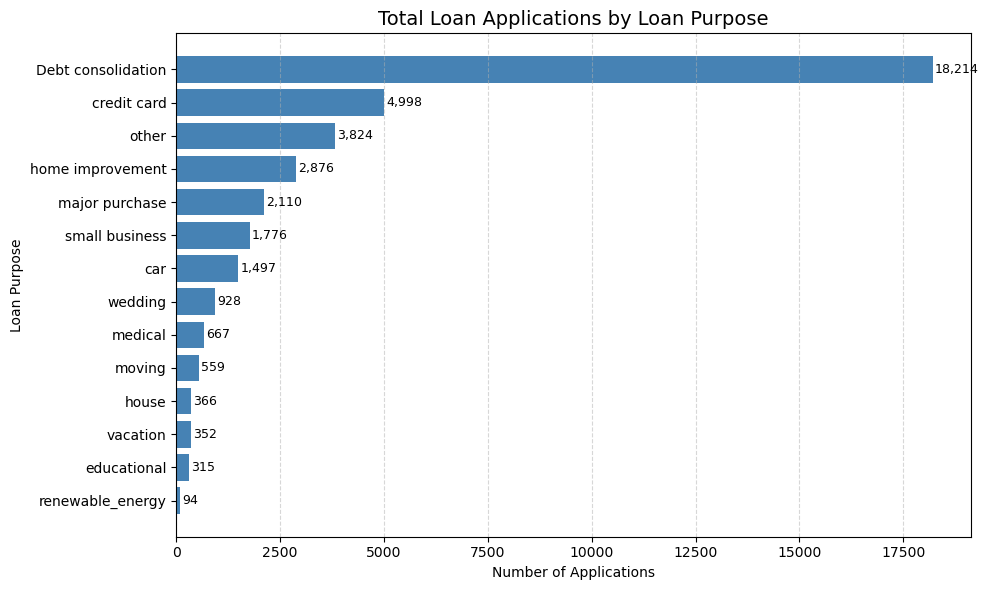

In [60]:
# Group by loan purpose and count loan applications
purpose_applications = (
    df.groupby('purpose')['id']
      .count()
      .sort_values()
)
# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_applications.index, purpose_applications.values, color='steelblue')  # choose color

# Annotate values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height() / 2,
             f'{width:,}',   # full number with commas
             va='center', fontsize=9)
# Titles and labels
plt.title('Total Loan Applications by Loan Purpose', fontsize=14) 
plt.xlabel('Number of Applications')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

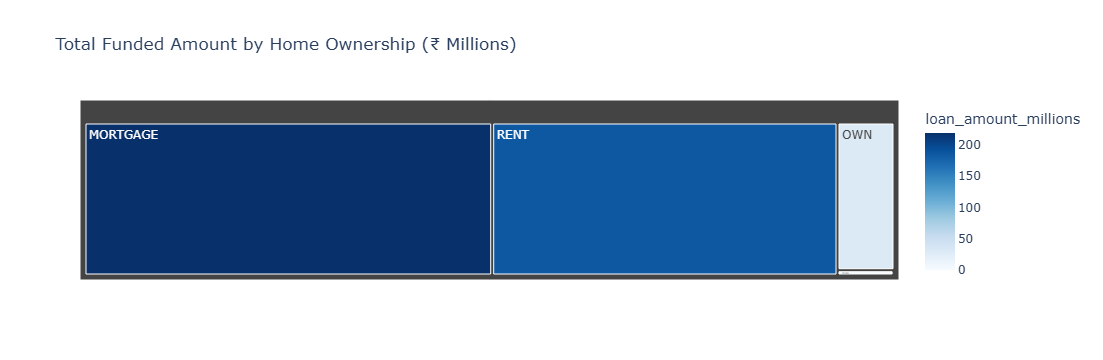

In [62]:
home_funding= df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions']= home_funding['loan_amount']/1_000_000

fig=px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership (₹ Millions)'
)
fig.show()

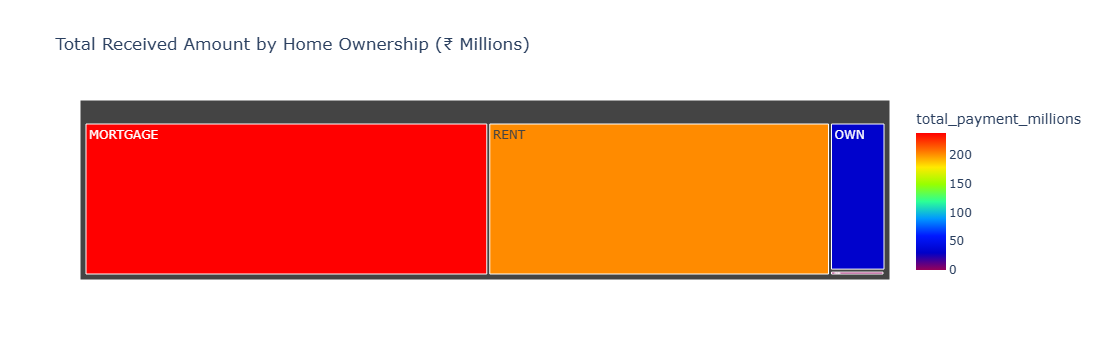

In [68]:
home_received= df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_received['total_payment_millions']= home_received['total_payment']/1_000_000

fig=px.treemap(
    home_received,
    path=['home_ownership'],
    values='total_payment_millions',
    color='total_payment_millions',
    color_continuous_scale='rainbow',
    title='Total Received Amount by Home Ownership (₹ Millions)'
)
fig.show()

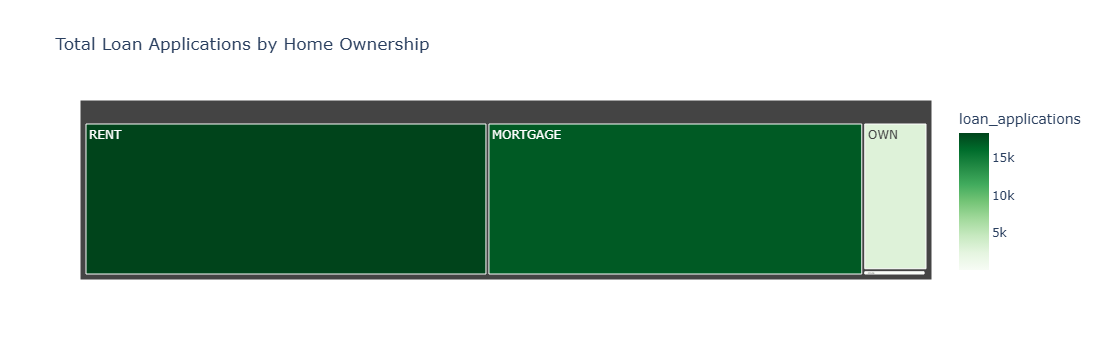

In [69]:
import plotly.express as px
# Group by home ownership and count loan applications
home_applications = df.groupby('home_ownership')['id'].count().reset_index()
home_applications.rename(columns={'id': 'loan_applications'}, inplace=True)
# Treemap
fig = px.treemap(
    home_applications,
    path=['home_ownership'],
    values='loan_applications',
    color='loan_applications',
    color_continuous_scale='Greens',
    title='Total Loan Applications by Home Ownership'
)
fig.show()